In [ ]:
pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.1 MB/s eta 0:00:00


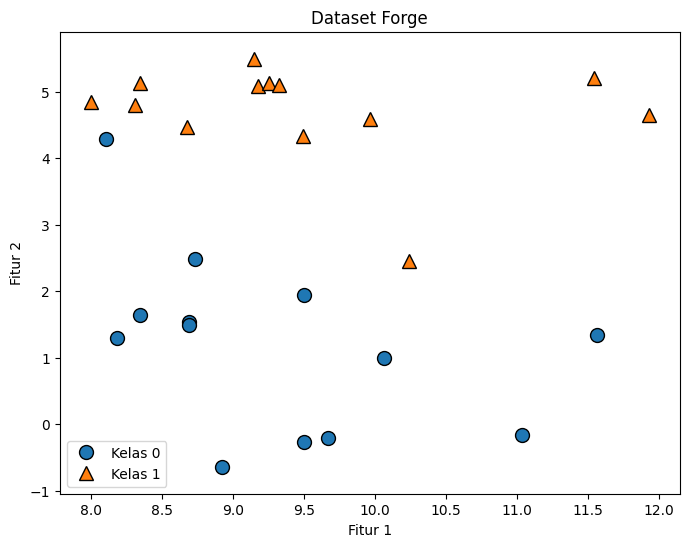

In [ ]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib  # Untuk penyimpanan model

# Menggunakan dataset sintetis dari mglearn
X, y = mglearn.datasets.make_forge()

# Visualisasi awal dataset
plt.figure(figsize=(8, 6))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.title("Dataset Forge")
plt.legend(["Kelas 0", "Kelas 1"])
plt.show()

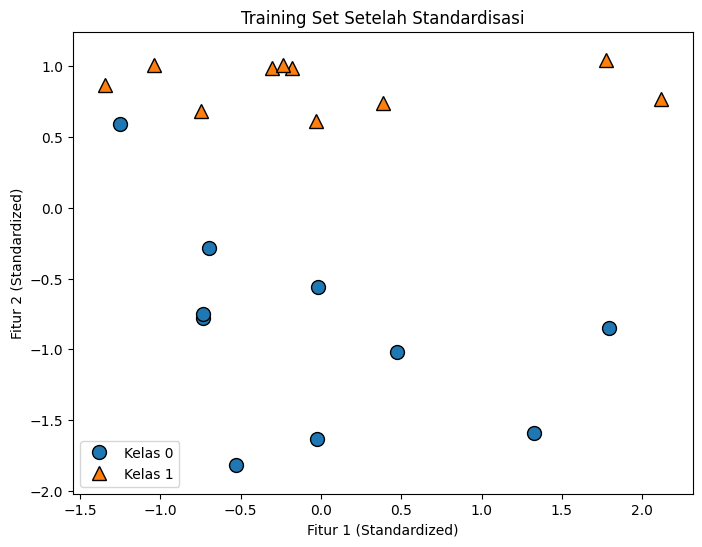

In [ ]:
# Membagi data menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualisasi data yang telah di-standardisasi
plt.figure(figsize=(8, 6))
mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], y_train)
plt.xlabel("Fitur 1 (Standardized)")
plt.ylabel("Fitur 2 (Standardized)")
plt.title("Training Set Setelah Standardisasi")
plt.legend(["Kelas 0", "Kelas 1"])
plt.show()

In [ ]:
# Definisikan parameter grid untuk C
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

# Inisialisasi SVM dengan kernel linear
svc = svm.SVC(kernel='linear')

# Grid Search dengan cross-validation 5-fold
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Menampilkan hasil Grid Search
print("Best parameter C:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Menggunakan model terbaik
best_clf = grid_search.best_estimator_


Best parameter C: {'C': 0.1}
Best cross-validation accuracy: 0.95


Akurasi pada data testing: 0.83


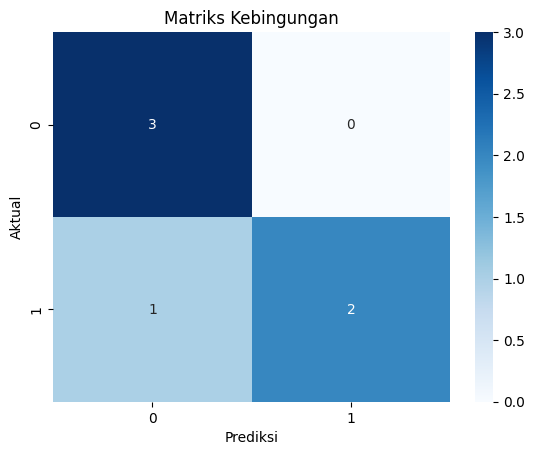

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



In [ ]:
# Prediksi pada data testing
y_pred = best_clf.predict(X_test_scaled)

# Evaluasi performa
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi pada data testing: {accuracy:.2f}")

# Matriks kebingungan
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Kebingungan")
plt.show()

# Laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

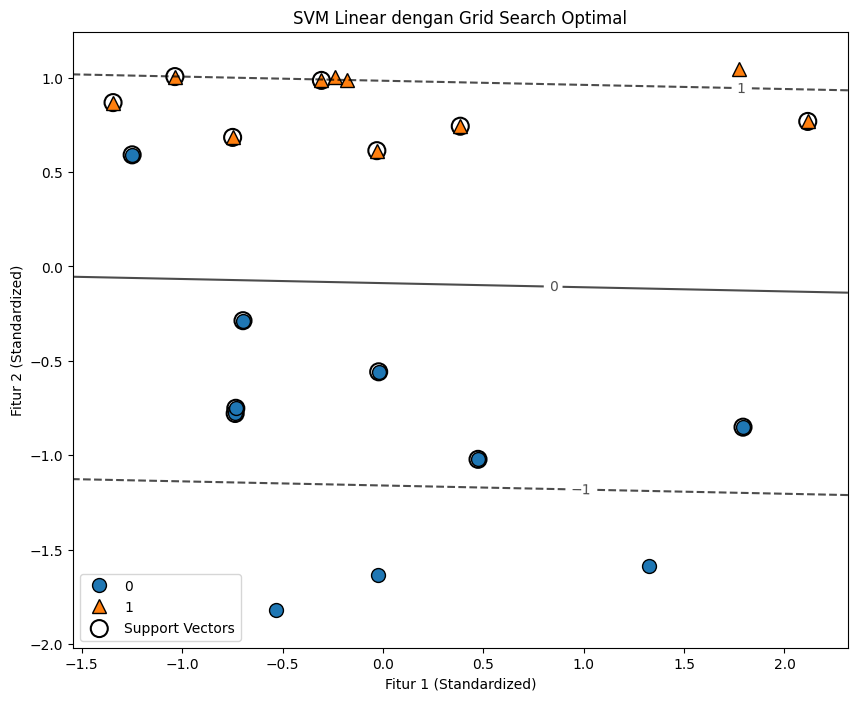

In [ ]:
# Visualisasi data dan decision boundary dengan model terbaik
plt.figure(figsize=(10, 8))
mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], y_train)
plt.xlabel("Fitur 1 (Standardized)")
plt.ylabel("Fitur 2 (Standardized)")
plt.title("SVM Linear dengan Grid Search Optimal")

ax = plt.gca()

# Mengambil batas minimum dan maksimum untuk plot
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Membuat grid untuk plot decision boundary
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = best_clf.decision_function(xy).reshape(XX.shape)

# Menggambar decision boundary dan margin
contour = ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
                     linestyles=['--', '-', '--'])
ax.clabel(contour, inline=1, fontsize=10)

# Menandai support vectors
ax.scatter(best_clf.support_vectors_[:, 0], best_clf.support_vectors_[:, 1],
           s=150, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')

plt.legend()
plt.show()

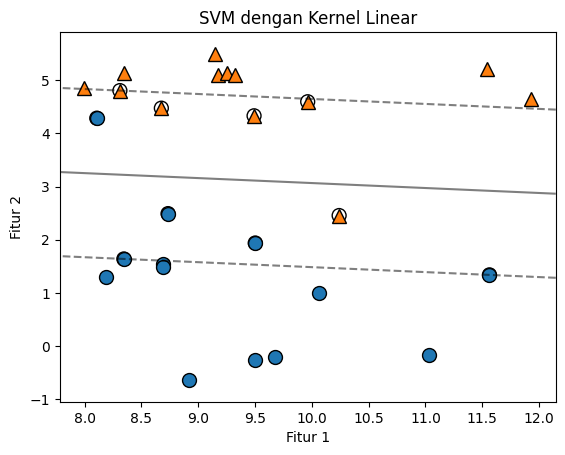

In [ ]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

# Menggunakan dataset sintetis dari mglearn
X, y = mglearn.datasets.make_forge()

# Membuat objek SVM dengan kernel linear
clf = svm.SVC(kernel='linear', C=0.1)

# Melatih model SVM
clf.fit(X, y)

# Visualisasi data dan decision boundary
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
ax = plt.gca()

# Mengambil batas minimum dan maksimum untuk plot
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Membuat grid untuk plot decision boundary
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Menggambar decision boundary dan margin
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Menandai support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.title("SVM dengan Kernel Linear")
plt.show()


## Pengaruh Variasi Nilai `C` pada SVM Linear

Dalam model Support Vector Machine (SVM) linear, parameter `C` memainkan peran penting dalam mengontrol **trade-off** antara **maksimalisasi margin** dan **minimisasi kesalahan klasifikasi**. Memahami bagaimana nilai `C` yang berbeda mempengaruhi model dapat membantu Anda mengoptimalkan performa SVM sesuai dengan karakteristik data Anda.

### Apa Itu Parameter `C`?

Parameter `C` adalah **parameter regularisasi** yang menentukan seberapa besar kesalahan klasifikasi pada data pelatihan yang dapat diterima. Secara spesifik:

- **`C` Tinggi (misalnya, 1000):**
  - Model berusaha meminimalkan kesalahan klasifikasi pada data pelatihan.
  - Margin menjadi lebih sempit.
  - Risiko overfitting meningkat, terutama jika data mengandung noise.

- **`C` Rendah (misalnya, 0.1):**
  - Model mengizinkan beberapa kesalahan klasifikasi untuk mendapatkan margin yang lebih lebar.
  - Meningkatkan regularisasi, membantu model dalam generalisasi ke data baru.
  - Risiko underfitting dapat terjadi jika `C` terlalu rendah.

### Pengaruh Nilai `C` yang Berbeda

Mari kita jelajahi bagaimana perubahan nilai `C` mempengaruhi berbagai aspek model SVM linear Anda:

#### 1. Margin dan Support Vectors

- **`C` Tinggi:**
  - **Margin:** Cenderung lebih sempit karena model berusaha meminimalkan kesalahan klasifikasi.
  - **Support Vectors:** Lebih sedikit support vectors yang dekat dengan margin.
  - **Visualisasi:** Garis decision boundary akan lebih dekat dengan beberapa titik data, dan margin akan lebih rapat.

- **`C` Rendah:**
  - **Margin:** Lebih lebar karena model lebih fleksibel dalam mengizinkan kesalahan klasifikasi.
  - **Support Vectors:** Lebih banyak support vectors, termasuk titik data yang jauh dari hyperplane.
  - **Visualisasi:** Garis decision boundary akan lebih jauh dari beberapa titik data, dan margin akan lebih lebar.

#### 2. Kesalahan Klasifikasi (Training Error)

- **`C` Tinggi:**
  - **Training Error:** Lebih rendah karena model berusaha meminimalkan kesalahan pada data pelatihan.
  - **Risiko Overfitting:** Tinggi, terutama jika data pelatihan mengandung noise.

- **`C` Rendah:**
  - **Training Error:** Lebih tinggi dibandingkan dengan `C` tinggi karena model mengizinkan beberapa kesalahan.
  - **Risiko Underfitting:** Rendah, model lebih sederhana dan cenderung lebih general.

#### 3. Akurasi pada Data Pengujian (Generalization)

- **`C` Tinggi:**
  - **Akurasi Pengujian:** Bisa tinggi jika data dapat dipisahkan dengan baik, namun berisiko rendah jika data mengandung noise.

- **`C` Rendah:**
  - **Akurasi Pengujian:** Lebih stabil dan cenderung lebih baik dalam generalisasi karena model tidak terlalu menyesuaikan diri dengan data pelatihan.

#### 4. Kompleksitas Model

- **`C` Tinggi:**
  - **Kompleksitas:** Lebih kompleks karena model berusaha memisahkan data dengan margin sempit.

- **`C` Rendah:**
  - **Kompleksitas:** Lebih sederhana dengan margin yang lebih lebar.

